### Dicionarios das variaveis

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
#import pingouin as pg
#from pingouin import pairwise_corr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
#import pingouin as pg
import random 
import scipy.stats
from scipy import stats
#import janitor
from sklearn import preprocessing

In [2]:
base_PAG_HEI = pd.read_csv('PAG_HEI.csv')
base_PHQ = pd.read_csv('DEMO_PHQ.csv')

### 1. Agrupamento dos bancos de dados

In [3]:
#VERIFICAÇÃO DOS VALORES DE CADA BASE E COLUNAS
#base_PAG_HEI.head()
#base_PHQ.head()

#base_PAG_HEI.columns
base_PHQ.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC'],
      dtype='object')

In [4]:
#VERIFICANDO TAMANHO DAS BASES
#base_PAG_HEI.shape
base_PHQ.shape

(5334, 15)

In [5]:
#CHECANDO SE EXISTEM LINHAS DUPLICADAS ANTES DE REALIZAR A JUNÇÃO DAS BASES
base_PAG_HEI.duplicated().sum()
base_PHQ.duplicated().sum()

0

In [6]:
#JOIN DAS COLUNAS POR MÉTODO OUTER JOIN, PARA PEGAR AS COLUNAS ÚNICAS DAS DUAS BASES
base = base_PHQ.merge(base_PAG_HEI, on='SEQN', how='inner')
base.to_csv('base_agrupada_inner.csv')

###### O interessante dessa nova base é analisar a relação entre o índice de saúde mental e os hábitos saudáveis; assim, a junção que fez mais sentido é a "inner", ainda que desconsiderando algumas descrições da base do Patient Health Questionnaire, que é maior. Para o caso de análise de dados referentes apenas à base do PHQ essa pode ser utilizada invés dessa nova base, visto que tem dados relativos a um maior número de entrevistados. 

### 2. Inspeção da base de dados agrupada

In [7]:
base.shape

(5334, 31)

#### 2.1 Verificação e alteração dos tipos de dados nas colunas


In [8]:
#OBTENDO OS TIPOS DAS COLUNAS
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

In [9]:
for column in base.iloc[:, 1:10]:
    print(base[column].value_counts())

0.0    3850
1.0     673
2.0     180
3.0     124
9.0       9
Name: DPQ010, dtype: int64
0.0    3769
1.0     769
2.0     179
3.0     114
9.0       5
Name: DPQ020, dtype: int64
0.0    3152
1.0    1071
3.0     320
2.0     286
9.0       7
Name: DPQ030, dtype: int64
0.0    2429
1.0    1706
2.0     370
3.0     326
9.0       5
Name: DPQ040, dtype: int64
0.0    3813
1.0     691
3.0     168
2.0     160
9.0       4
Name: DPQ050, dtype: int64
0.0    4134
1.0     513
2.0      95
3.0      89
9.0       5
Name: DPQ060, dtype: int64
0.0    4070
1.0     545
2.0     118
3.0      99
9.0       4
Name: DPQ070, dtype: int64
0.0    4362
1.0     341
2.0      79
3.0      45
9.0       9
Name: DPQ080, dtype: int64
0.0    4667
1.0     122
2.0      32
3.0      13
9.0       2
Name: DPQ090, dtype: int64


In [10]:
'''AS COLUNAS DO PHQ TEM O VALOR EM FLOAT E SERÃO SOMADAS PARA OBTENÇÃO DO SCORE, NO ENTANTO, OS VALORES "7" E "9" SÃO REFERENTES ÀS PESSOAS QUE NÃO RESPONDERAM O QUESTIONÁRIO E, POR ISSO, DEVEM SER DESCONSIDERADOS. VERIFICO O NÚMERO DE "7" E "9" E ALTERO PARA O VALOR MEDIANO DA COLUNA INSPECIONADA, VISANDO NÃO CRIAR UMA GRANDE ALTERAÇÃO NA SOMATÓRIA DOS PONTOS DO QUESTIONÁRIO, QUE SERÁ OBTIDA FUTURAMENTE NESSE CÓDIGO.
NÃO HÁ NENHUM NÚMERO "7" E OS "9" SÃO POUCOS NÚMEROS, ENTÃO A ALTERAÇÃO NÃO DEVE MODIFICAR MUITO A LEITURA DA BASE'''
#base.info()

for column in base.iloc[:, 1:10]:
#    print(base[column].value_counts())
    base[column].replace(9.0, base[column].median(), inplace=True)

In [11]:
#ALGUMAS VARIÁVEIS CATEGÓRICAS ESTÃO COMO TIPO FLOAT. ALTERO PARA 'CATEGORY' PARA FACILITAR A ANÁLISE
for column in ['RIAGENDR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC', 'ADHERENCE']:
#    print(base[column].value_counts())
    base[column] = base[column].astype('category')

base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SEQN                      5334 non-null   int64   
 1   DPQ010                    4836 non-null   float64 
 2   DPQ020                    4836 non-null   float64 
 3   DPQ030                    4836 non-null   float64 
 4   DPQ040                    4836 non-null   float64 
 5   DPQ050                    4836 non-null   float64 
 6   DPQ060                    4836 non-null   float64 
 7   DPQ070                    4836 non-null   float64 
 8   DPQ080                    4836 non-null   float64 
 9   DPQ090                    4836 non-null   float64 
 10  RIAGENDR                  5334 non-null   category
 11  RIDAGEYR                  5334 non-null   int64   
 12  RIDRETH1                  5334 non-null   category
 13  DMDEDUC                   5334 non-null   catego

In [12]:
#FALTA, AINDA, CHECAR SE NÃO EXISTEM VALORES ESTRANHOS NOS SCORES DO HEI, NESSE CASO, VERIFICO OS NÚMEROS MÍNIMOS E MÁXIMOS PARA SABER SE NÃO EXISTE NENHUM NÚMERO ESTRANHO ÀS BASES

for col in base.loc[:, 'HEI2015C1_TOTALVEG': 'HEI2015C13_ADDSUG']:
    min_ = base[col].min()
    max_ = base[col].max()
    print(f'Na coluna {base[col].name} o valor mínimo é {min_} e o valor máximo é {max_}')


Na coluna HEI2015C1_TOTALVEG o valor mínimo é 0.0 e o valor máximo é 5.0
Na coluna HEI2015C2_GREEN_AND_BEAN o valor mínimo é 0.0 e o valor máximo é 5.0
Na coluna HEI2015C3_TOTALFRUIT o valor mínimo é 0.0 e o valor máximo é 5.0
Na coluna HEI2015C4_WHOLEFRUIT o valor mínimo é 0.0 e o valor máximo é 5.0
Na coluna HEI2015C5_WHOLEGRAIN o valor mínimo é 0.0 e o valor máximo é 5.0
Na coluna HEI2015C6_TOTALDAIRY o valor mínimo é 0.0 e o valor máximo é 5.0
Na coluna HEI2015C7_TOTPROT o valor mínimo é 0.0 e o valor máximo é 5.0
Na coluna HEI2015C8_SEAPLANT_PROT o valor mínimo é 0.0 e o valor máximo é 5.0
Na coluna HEI2015C9_FATTYACID o valor mínimo é 0.0 e o valor máximo é 10.0
Na coluna HEI2015C10_SODIUM o valor mínimo é 0.0 e o valor máximo é 10.0
Na coluna HEI2015C11_REFINEDGRAIN o valor mínimo é 0.0 e o valor máximo é 10.0
Na coluna HEI2015C12_SFAT o valor mínimo é 0.0 e o valor máximo é 10.0
Na coluna HEI2015C13_ADDSUG o valor mínimo é 0.0 e o valor máximo é 10.0


######  Há duas inconsistências aqui. As colunas de grãos integrais (WHOLEGRAIN) e LATICÍNIOS (TOTALDAIRY) vão de 0 a 10 segundo a documentação, mas na base os valores vão de 0-5. Pela exatidão dos valores imagino que há problemas na documentação.

#### 2.2 Tratamento de valores nulos

In [13]:
#ENCONTRANDO OS VALORES NULOS DA BASE
#base.isnull().sum()
base.dropna(axis=0, subset='DPQ010', inplace=True)

###### Como a base de saúde mental é maior do que as outras, existem 498 valores nulos em cada uma das colunas importadas do PHQ, referentes às entradas que não tem sequência numérica encontrada na base de nutrição e esportes. Como a análise é principalmente referente à relação entre essas duas colunas, removi as linhas sem valores para a base de hábitos saudáveis. 

In [14]:
#COM OS VALORES NULOS REFERENTES AO PHQ REMOVIDOS, É HORA DE TRATAR OS NULOS DAS BASES DE HÁBITOS SAUDÁVEIS. PARA O CASO DA VARIÁVEL CATEGÓRICA O PREENCHIMENTO É FEITO COM A MODA, ISSO É, A CATEGORIA QUE APARECE MAIS. NO CASO DOS DADOS NUMÉRICOS É NECESSÁRIO, PRIMEIRO, VERIFICAR A DISTRIBUIÇÃO DOS DADOS, CASO AS DISTRIBUIÇÕES SEJAM NORMAIS, SERÁ ADOTADO A MÉDIA PARA PREECHIMENTO DOS DADOS FALTANTES, CASO A DISTRIBUIÇÃO SEJA DESIGUAL OS DADOS SERÃO TRATADOS COM A UTILIZAÇÃO DA MEDIANA.

lista_histogramas = [base[col].name for col in base.columns if base[col].name[0:7] == 'HEI2015'] 

def plot_histogramas(lista):
    figure, axes = plt.subplots(2, round(len(lista_histogramas)/2), figsize=(25,10), facecolor='white')

    x, y = 0, 0
    for col in lista:
        axes[x, y].hist(x=base[col], color='#C3C49E')
        axes[x, y].axvline(base[col].mean(), color='#524632')
        axes[x, y].axvline(base[col].median(), color='red', linestyle='--')
        axes[x, y].set_xlabel(col)
        axes[x, y].xaxis.set_label_position('top')
        if x == y == 0:
            x += 1
        elif x == 1:
            y += 1
            x = 0
        elif x == 0:
            x += 1

    figure.suptitle('Figura 1 - Histogramas de distribuição das variáveis na base', fontsize=16)

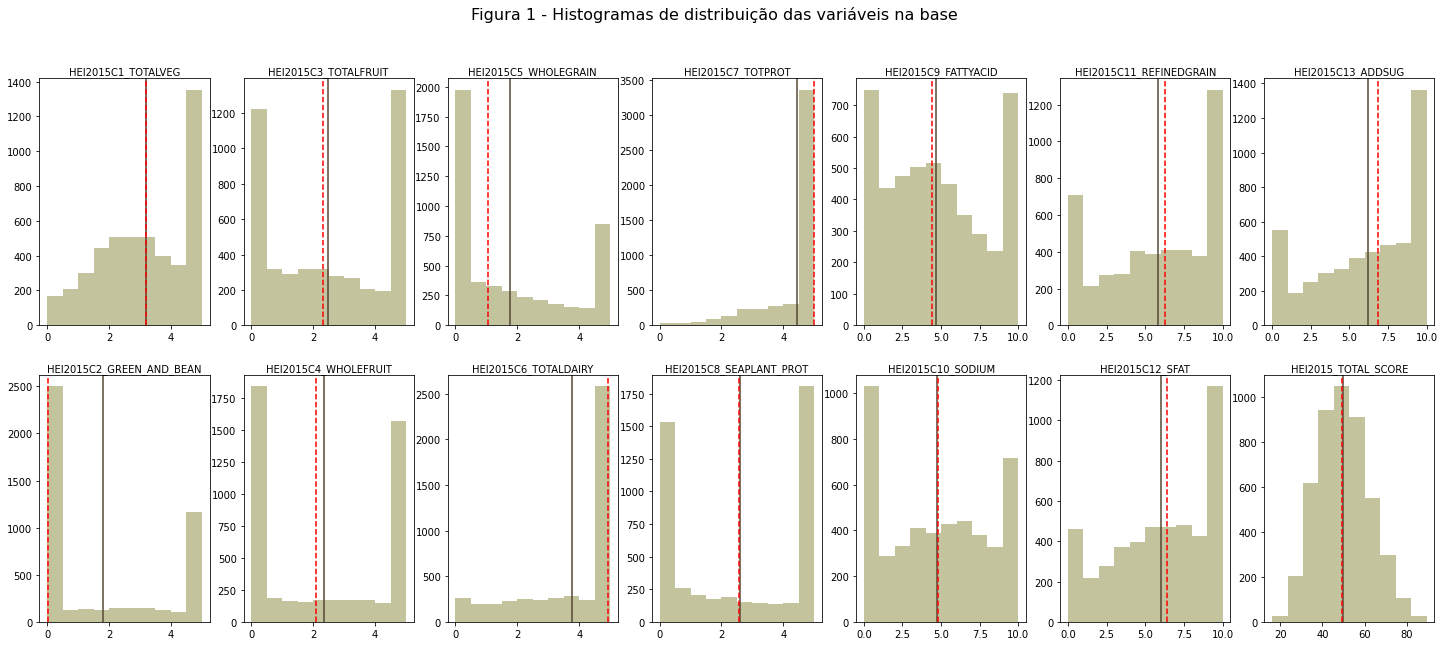

In [15]:
plot_histogramas(lista_histogramas)

In [16]:
#COMO EM TODOS OS CASOS A MÉDIA E A MEDIANA NÃO ESTIVERAM MUITO DISPERSAS, PREENCHO TODAS AS VARIÁVEIS NUMÉRICAS COM SUAS MÉDIAS
moda_indfminc = base['INDFMINC'].mode()

base.loc[:, 'INDFMINC'].fillna(11.0, inplace=True)
[base[col].fillna(base[col].mean(), inplace=True) for col in lista_histogramas]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### 3. Criação de colunas adicionais para análise

In [17]:
#CRIAÇÃO DE UMA COLUNA QUE SOMA O TOTAL DO VALOR DE SAÚDE MENTAL DOS PACIENTES A PARTIR DAS RESPOSTAS DO PHQ
base['phq9_score'] = base.loc[:,'DPQ010':'DPQ090'].sum(1)

In [18]:
#COLUNA QUE CATEGORIZA A CONDIÇÃO DE SAÚDE MENTAL DO PACIENTE A PARTIR DO SOMATÓRIO DAS RESPOSTAS
condicoes = [
        (base['phq9_score'] < 5),
        (base['phq9_score'] >= 5) & (base['phq9_score'] < 10),
        (base['phq9_score'] >= 10) & (base['phq9_score'] < 15),
        (base['phq9_score'] >= 15) & (base['phq9_score'] < 19),
        (base['phq9_score'] >= 19)
        ]

valores = ['0', '1', '2', '3', '4']

base['phq_grp'] = np.select(condicoes, valores)
base.to_csv('base_corrigida.csv')

### 4. Análise exploratória dos dados

In [19]:
base = pd.read_csv('base_corrigida.csv')
base.columns

Index(['Unnamed: 0', 'SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050',
       'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDEDUC', 'INDFMINC', 'PAG_MINW', 'ADHERENCE',
       'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE',
       'phq9_score', 'phq_grp'],
      dtype='object')

#### 4.1 Análises univariadas

Text(0.5, 0.98, 'Analises Univariadas das categorias socioeconômicas')

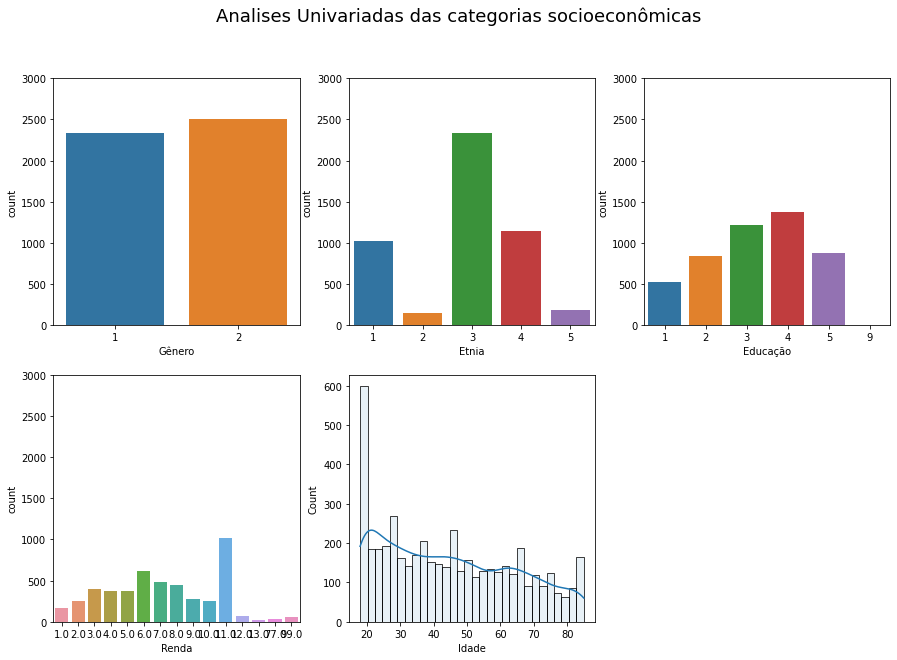

In [20]:
#OBTENDO GRÁFICOS POPULACIONAIS: GÊNERO, IDADE
#OBTENDO GRÁFICOS SOCIOECONÔMICOS: ETNIA, EDUCAÇÃO, RENDA 

#print(teste)
fig, axes = plt.subplots(2, 3, figsize=(15,10))
for num, col in enumerate({'RIAGENDR':'Gênero', 'RIDRETH1':'Etnia', 'DMDEDUC':'Educação','INDFMINC':'Renda'}.items()):
    sns.countplot(x=col[0], data=base, ax=axes.flat[num])
    axes.flat[num].set_xlabel(col[1])
    axes.flat[num].set_ylim(0,3000)

sns.histplot(x='RIDAGEYR', data=base, bins=30, ax=axes.flat[4], alpha=0.1, kde=True)
axes.flat[4].set_xlabel('Idade')
axes.flat[5].set_visible(False)

plt.suptitle('Analises Univariadas das categorias socioeconômicas', fontsize=18)

Text(0.5, 0.98, 'Analises Univariadas das categorias relacionadas a saúde dos entrevistados')

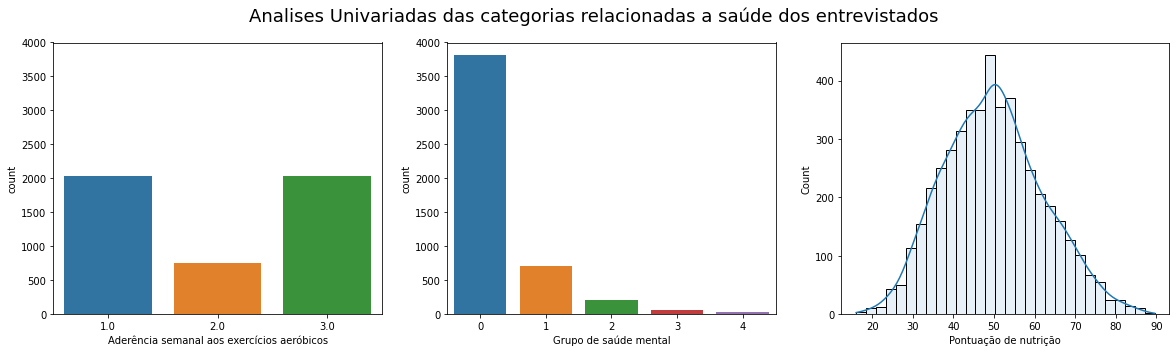

In [21]:
#OBTENDO GRÁFICOS DE SAÚDE PSICOLÓGICA, EXERCÍCIOS FÍSICOS E NUTRIÇÃO
fig, axes = plt.subplots(1, 3, figsize=(20,5))
for num, col in enumerate({'ADHERENCE':'Aderência semanal aos exercícios aeróbicos', 'phq_grp':'Grupo de saúde mental'}.items()):
    sns.countplot(x=col[0], data=base, ax=axes.flat[num])
    axes.flat[num].set_xlabel(col[1])
    axes.flat[num].set_ylim(0,4000)

sns.histplot(x='HEI2015_TOTAL_SCORE', data=base, bins=30, ax=axes.flat[2], alpha=0.1, kde=True)
axes.flat[2].set_xlabel('Pontuação de nutrição')
plt.suptitle('Analises Univariadas das categorias relacionadas a saúde dos entrevistados', fontsize=18)

#### 4.2 Análises Bivariadas

In [22]:
base['phq_grp'] = base['phq_grp'].astype('category')

Text(0.5, 0.98, 'Dados dos entrevistados por grupo de saúde psicológica')

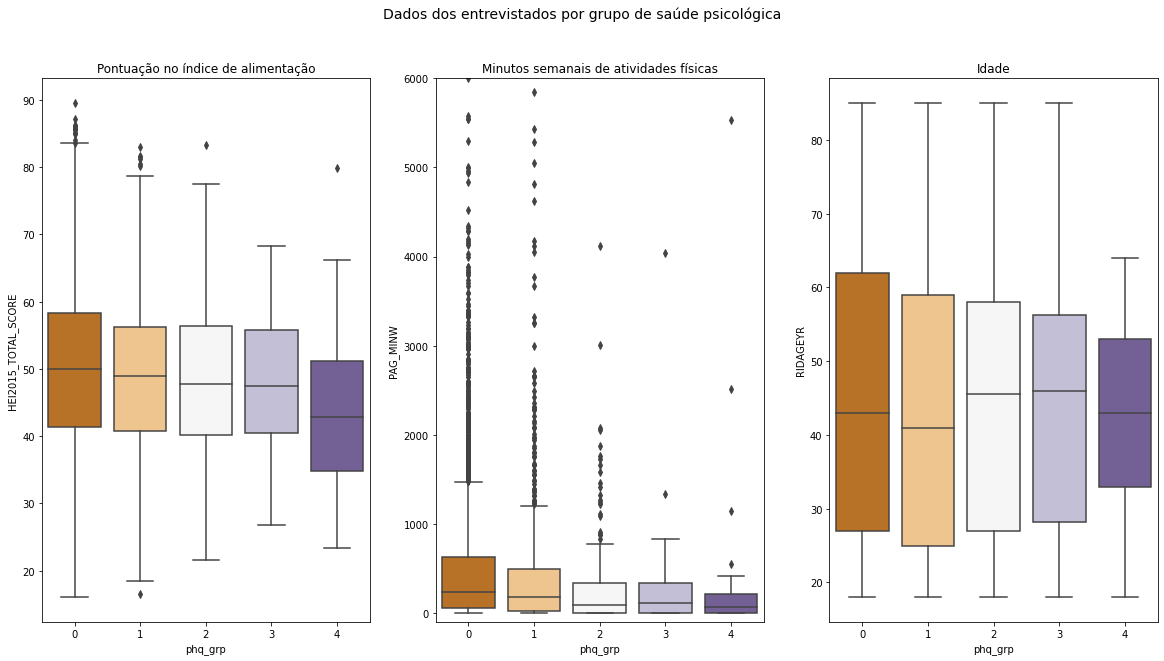

In [23]:
#O PRIMEIRO PASSO É ENTENDER A RELAÇÃO ENTRE A SAÚDE DOS PACIENTES E OS ÍNDICES DE EXERCÍCIOS FÍSICOS E , COLOCO TAMBÉM A IDADE POR SER UMA CATEGORIA NUMÉRICA INTERESSANTE PARA O ENTENDIMENTO
fig, axes = plt.subplots(1, 3, figsize=(20,10), facecolor='white')
#sns.histplot(x='phq_grp', data=base, element='poly')
sns.boxplot(y='HEI2015_TOTAL_SCORE', x='phq_grp', data=base, ax=axes[0], palette='PuOr')
sns.boxplot(y='PAG_MINW', x='phq_grp', data=base, ax=axes[1], palette='PuOr')
sns.boxplot(y='RIDAGEYR', x='phq_grp', data=base, ax=axes[2], palette='PuOr')
axes[1].set_ylim(-100,6000)
axes[0].set_title('Pontuação no índice de alimentação')
axes[1].set_title('Minutos semanais de atividades físicas')
axes[2].set_title('Idade')
plt.suptitle('Dados dos entrevistados por grupo de saúde psicológica', fontsize=14)

#sns.scatterplot(x='PAG_MINW', y='HEI2015_TOTAL_SCORE', data=base_phq_maior, ax=axes[1], hue='RIAGENDR')



<AxesSubplot:xlabel='phq_grp', ylabel='HEI2015_TOTAL_SCORE'>

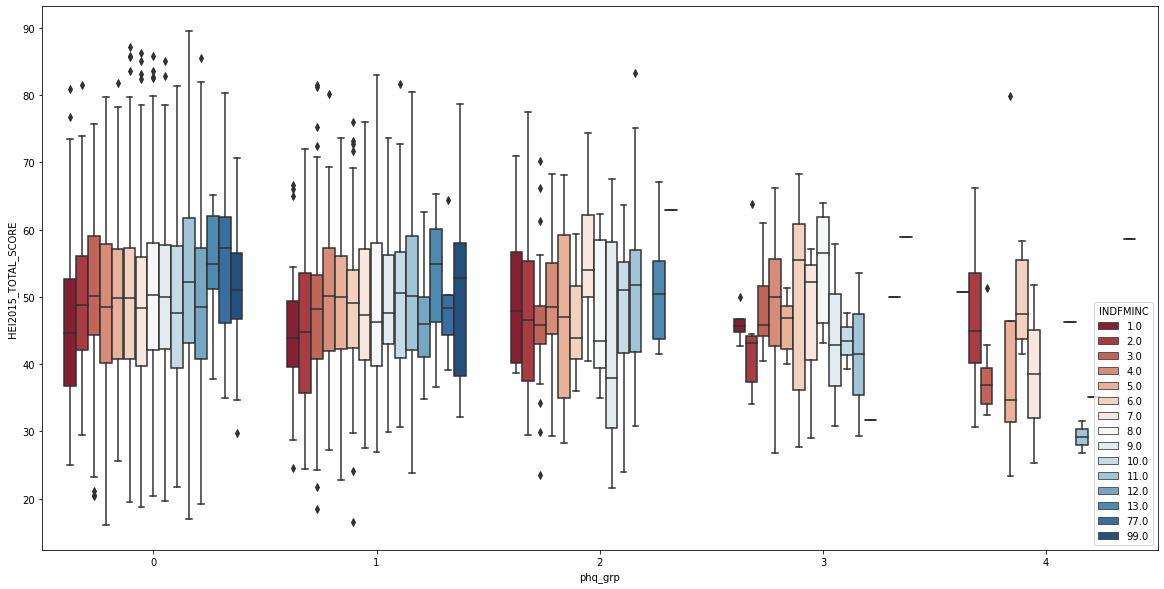

In [24]:
fig, axes = plt.subplots(figsize=(20,10), facecolor='white')
sns.boxplot(y='HEI2015_TOTAL_SCORE', x='phq_grp', data=base, hue='INDFMINC', palette='RdBu')

"(base\n    .groupby('INDFMINC')['phq_grp']\n    .value_counts(normalize=True)\n    .mul(100)\n    .rename('percent')\n    .reset_index()\n    .pipe((sns.catplot, 'data'), x='INDFMINC', y='percent', hue='phq_grp', kind='bar'))"

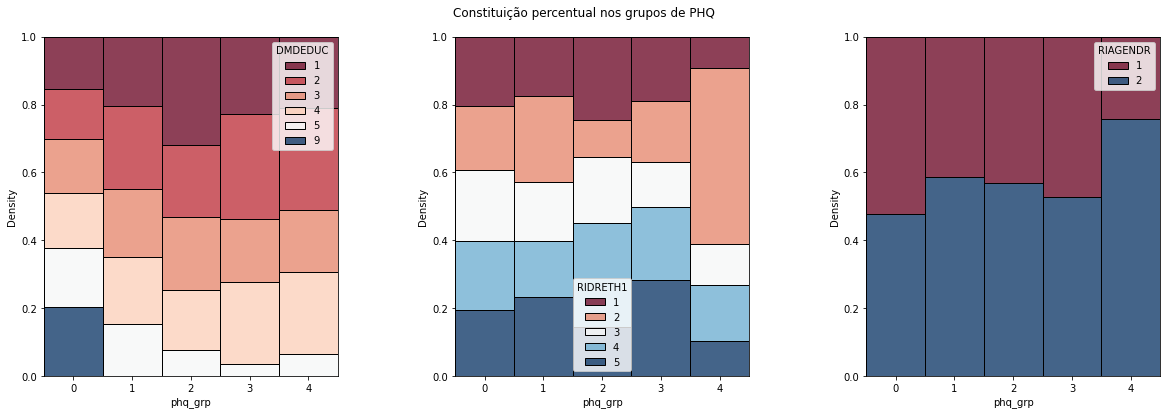

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20,6), facecolor='white')
sns.histplot(x=base['phq_grp'], hue=base['DMDEDUC'], multiple='fill', stat='density',common_norm=False, palette='RdBu', ax=axes.flat[0])
sns.histplot(x=base['phq_grp'], hue=base['RIDRETH1'], multiple='fill', stat='density',common_norm=False, palette='RdBu', ax=axes.flat[1])
#sns.histplot(x=base['phq_grp'], hue=base['ADHERENCE'], multiple='fill', stat='density',common_norm=False, palette='RdBu', ax=axes.flat[2])
sns.histplot(x=base['phq_grp'], hue=base['RIAGENDR'], multiple='fill', stat='density',common_norm=False, palette='RdBu', ax=axes.flat[2])



#axes.flat[3].set_ylim(0,2)

plt.suptitle('Constituição percentual nos grupos de PHQ')
plt.subplots_adjust(top=0.91, wspace=0.4)


'''(base
    .groupby('INDFMINC')['phq_grp']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot, 'data'), x='INDFMINC', y='percent', hue='phq_grp', kind='bar'))'''

#sns.histplot(x='HEI2015_TOTAL_SCORE', data=base_normalizada, bins=30, alpha=0.1, kde=True)
#axes.set_ylim(0,200)

Text(0.5, 0.98, 'Score do PHQ por idade do entrevistado')

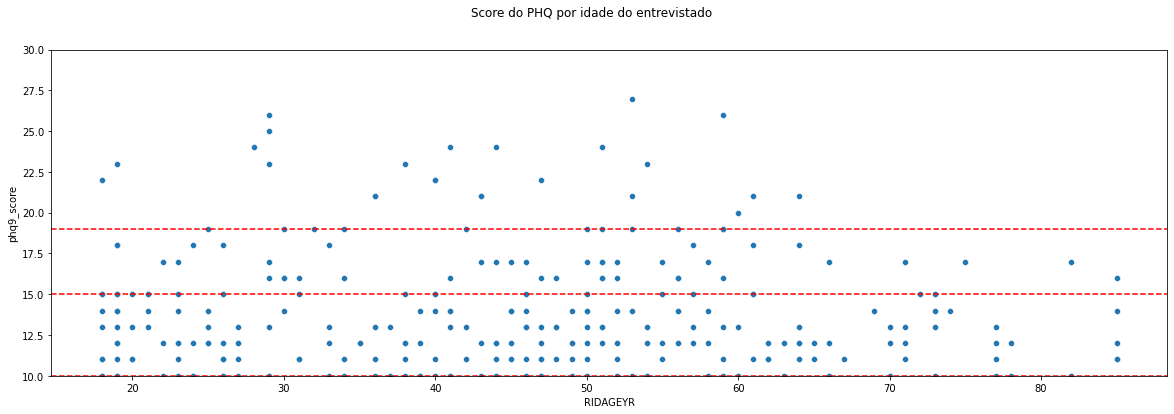

In [26]:
fig, axes = plt.subplots(figsize=(20,6), facecolor='white')
sns.scatterplot(x='RIDAGEYR', y='phq9_score', data=base)
axes.set_ylim(10,30)
axes.axhline(y=10, linestyle='--', color='red')
axes.axhline(y=15, linestyle='--', color='red')
axes.axhline(y=19, linestyle='--', color='red')
fig.suptitle('Score do PHQ por idade do entrevistado')

Text(0.5, 0.98, 'Proporção de entrevistados por pontuação no score de nutrição e grupo do PHQ')

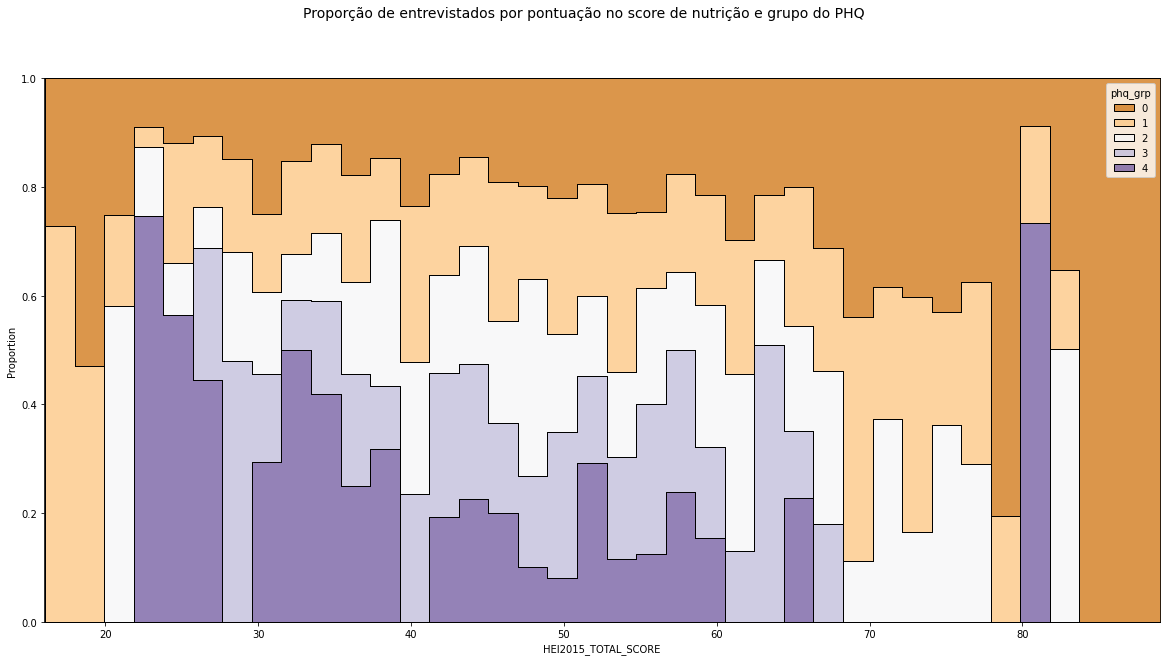

In [29]:
fig, axes = plt.subplots(figsize=(20,10), facecolor='white')
sns.histplot(x=base['HEI2015_TOTAL_SCORE'], hue=base['phq_grp'], multiple='fill', stat='proportion',common_norm=False, palette='PuOr', element="step")
axes.set_xlim(16,89)
fig.suptitle('Proporção de entrevistados por pontuação no score de nutrição e grupo do PHQ', fontsize=14)

Text(152, 0.7, '150 minutos semanais')

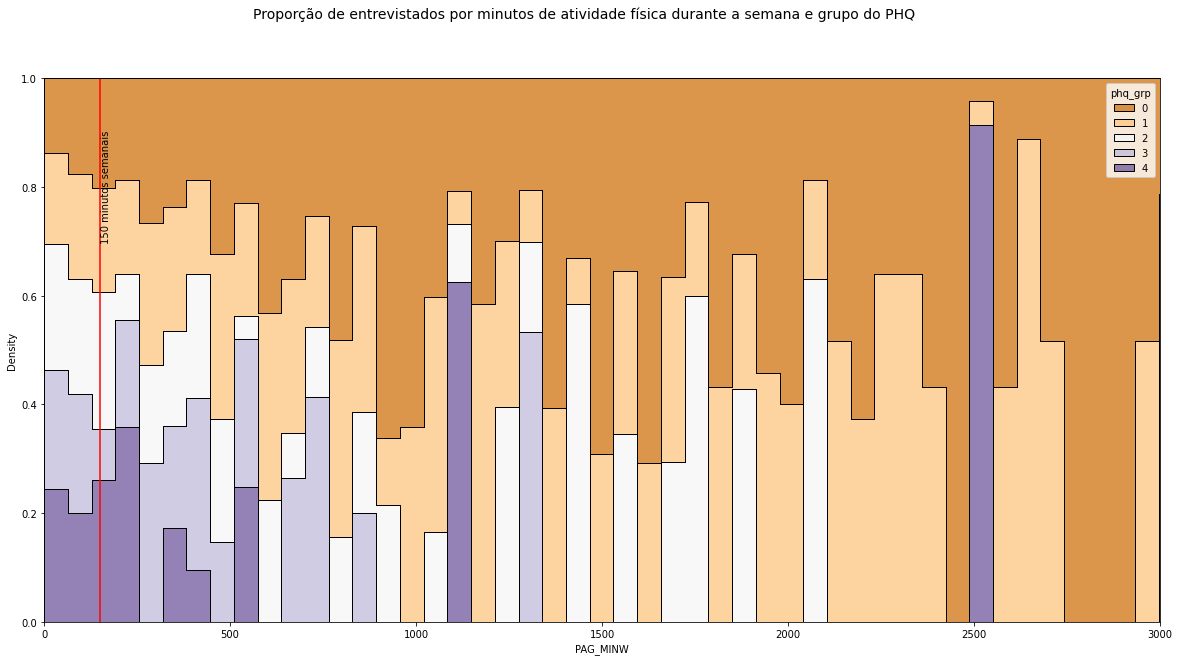

In [40]:
fig, axes = plt.subplots(figsize=(20,10), facecolor='white')
sns.histplot(x=base['PAG_MINW'], hue=base['phq_grp'], multiple='fill', stat='density',common_norm=False, palette='PuOr', element="step")
axes.set_xlim(0,3000)
fig.suptitle('Proporção de entrevistados por minutos de atividade física durante a semana e grupo do PHQ', fontsize=14)
axes.axvline(x=150, color='red')
axes.text(152, 0.7,'150 minutos semanais', rotation=90)

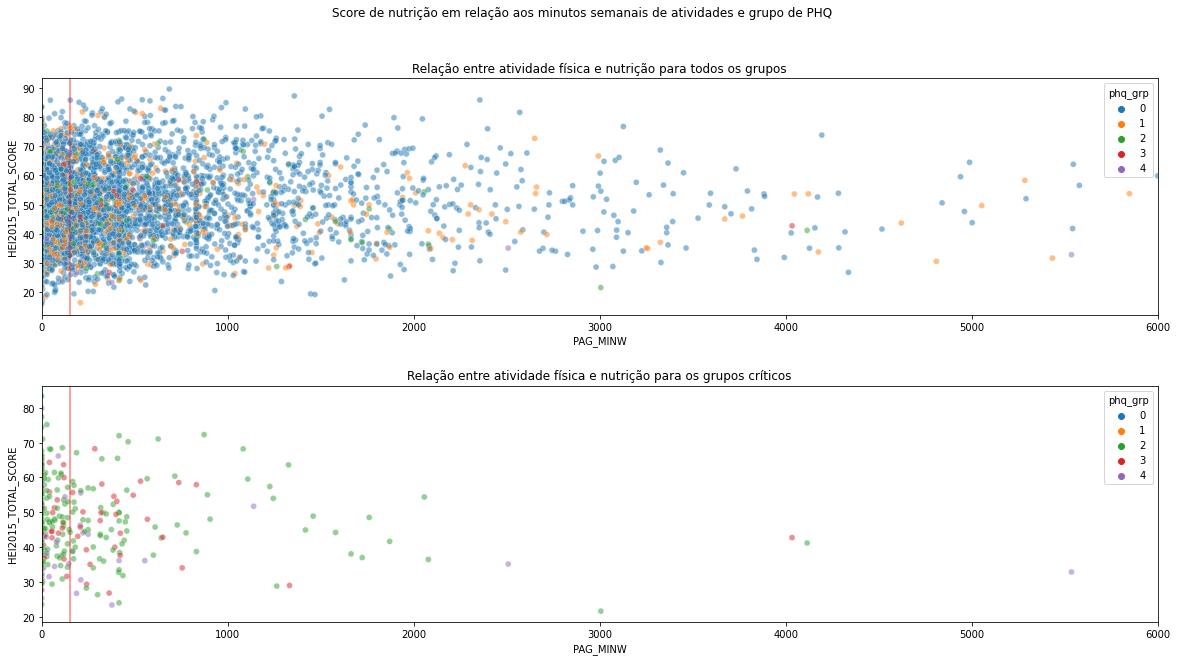

In [102]:
base_piores_condicoes = base[base.phq_grp.astype(int) > 1]

fig, axes = plt.subplots(2, 1, figsize=(20,10), facecolor='white')
sns.scatterplot(x='PAG_MINW', y='HEI2015_TOTAL_SCORE', hue='phq_grp', data=base, ax=axes[0], alpha=0.5)
sns.scatterplot(x='PAG_MINW', y='HEI2015_TOTAL_SCORE', hue='phq_grp', data=base_piores_condicoes, alpha=0.5)
axes[0].set_title('Relação entre atividade física e nutrição para todos os grupos')
axes[1].set_title('Relação entre atividade física e nutrição para os grupos críticos')
axes[0].set_xlim(0,6000)
axes[1].set_xlim(0,6000)
axes[0].axvline(x = 150, color='red', alpha=0.5)
axes[1].axvline(x = 150, color='red', alpha=0.5)

plt.suptitle('Score de nutrição em relação aos minutos semanais de atividades e grupo de PHQ')
plt.subplots_adjust(hspace=0.3, wspace=0.3)

Text(0.5, 0.98, 'Correlação numérica entre o score do PHQ dos entrevistados, a pontuação de nutrição e os minutos de corrida semanais')

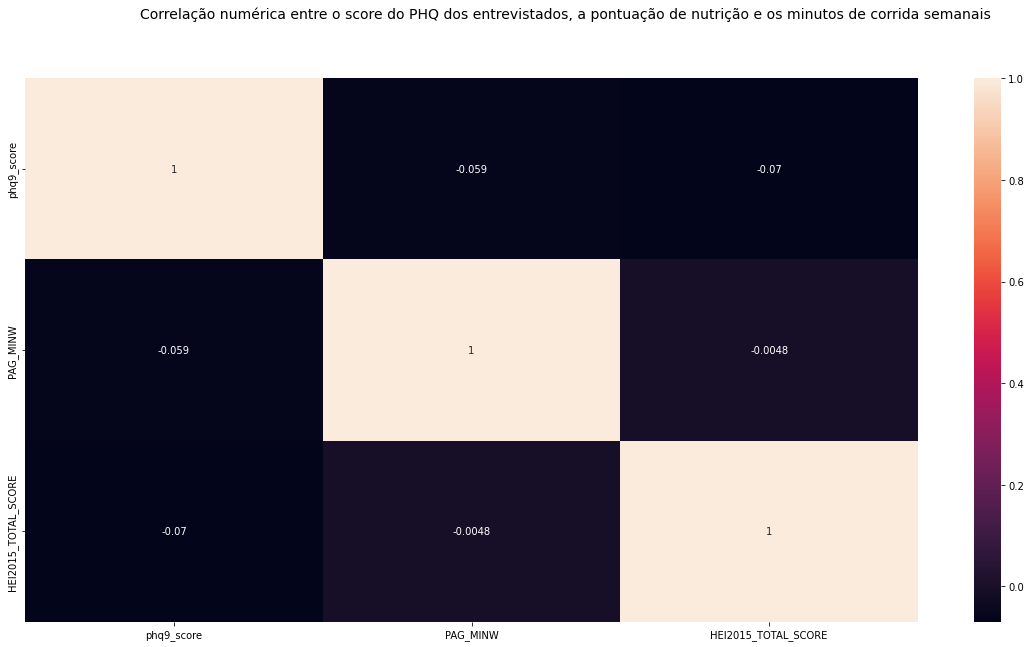

In [71]:
fig, axes = plt.subplots(1, 1, figsize=(20,10), facecolor='white')
sns.heatmap(base.loc[:, ['phq9_score', 'PAG_MINW', 'HEI2015_TOTAL_SCORE']].corr(), annot=True)
plt.suptitle('Correlação numérica entre o score do PHQ dos entrevistados, a pontuação de nutrição e os minutos de corrida semanais', fontsize=14)

<AxesSubplot:xlabel='phq9_score', ylabel='HEI2015_TOTAL_SCORE'>

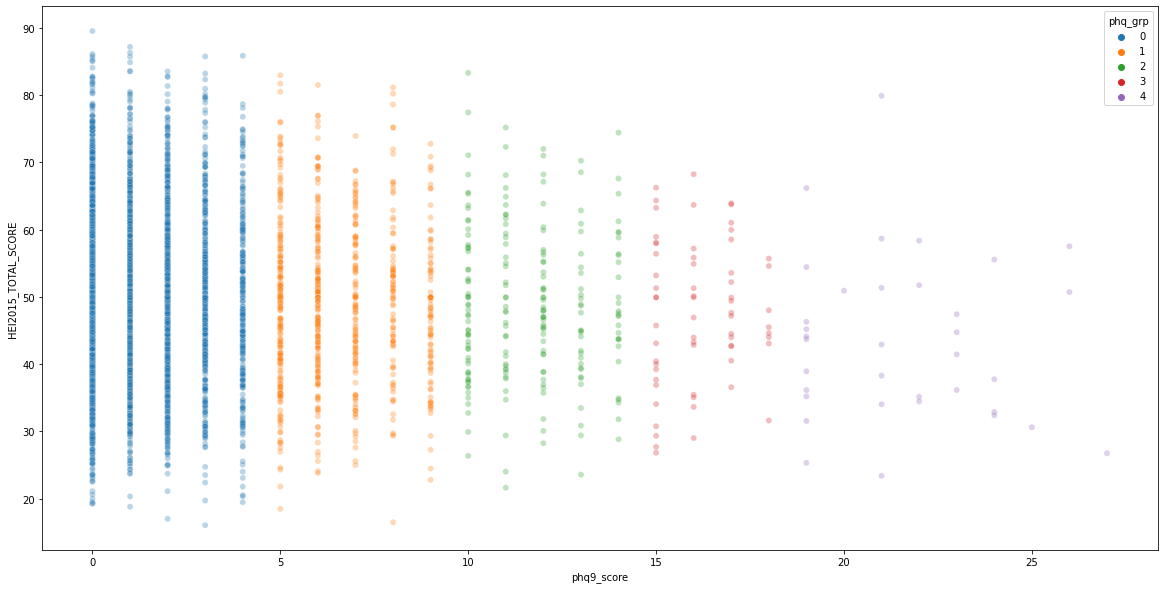

In [108]:
fig, axes = plt.subplots(figsize=(20,10), facecolor='white')
sns.scatterplot(x='phq9_score', y='HEI2015_TOTAL_SCORE', hue='phq_grp', data=base, alpha=0.3)